# Watershed algorithm-Image segmentation

The Watershed Algorithm is a powerful *image segmentation technique* used to partition an image into distinct regions based on the *topology* of the image. 

It is a mathematical morphology method that treats the image as a topographic surface where lighter pixels represent peaks and darker pixels represent valleys. The algorithm "floods" the image from these markers and segments regions based on the "catchment basins." 

The watershed lines are the boundaries between these regions, which can be used for separating different objects in the image.

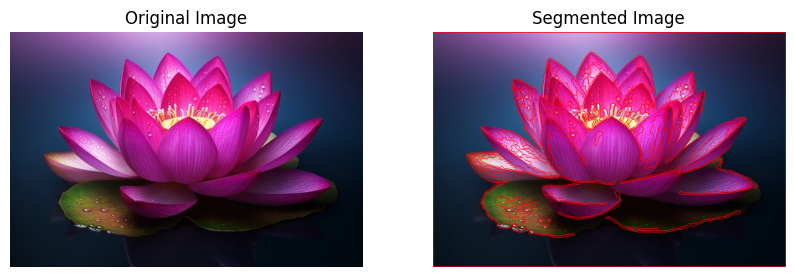

True

In [6]:
# 22BAI10033
# Shreya Tripathi

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('lotus.jpg')
original_img = img.copy()  # Preserve a copy of the original image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve segmentation
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply edge detection using Canny
edges = cv2.Canny(blurred, 30, 100)

# Perform distance transform
dist_transform = cv2.distanceTransform(edges, cv2.DIST_L2, 5)

# Normalize the result to a range of 0 to 1
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Mark the background as unknown
sure_bg = cv2.dilate(edges, None, iterations=3)

# Ensure sure_fg and sure_bg are of the same type
sure_fg = np.uint8(sure_fg)
sure_bg = np.uint8(sure_bg)

# Subtract sure foreground from sure background to get unknown regions
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers for segmentation
_, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all markers to distinguish background from markers
markers = markers + 1
markers[unknown == 255] = 0  # Mark the unknown regions as 0

# Apply the watershed algorithm on the copied image
cv2.watershed(original_img, markers)

# Mark the boundaries of the segmented regions
original_img[markers == -1] = [0, 0, 255]  # Red boundaries

# Display the result using Matplotlib
plt.figure(figsize=(10, 5))

# Show the original image and the segmented image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.axis('off')
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))

plt.show()

# Optionally, save the segmented image
cv2.imwrite('segmented_watershed.jpg', original_img)


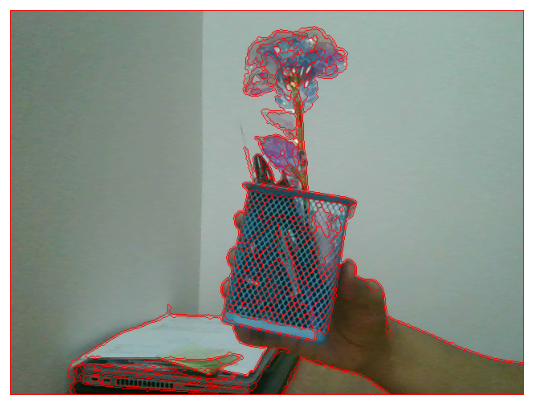

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Start video capture (webcam)
cap = cv2.VideoCapture(0)

# Set up Matplotlib for real-time display
plt.ion()  # Turn on interactive mode
fig, ax = plt.subplots(figsize=(10, 5))  # Create a figure for the plot

while True:
    # Read a frame from the video capture
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Convert the frame from BGR to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply edge detection using Canny
    edges = cv2.Canny(blurred, 30, 100)

    # Perform distance transform
    dist_transform = cv2.distanceTransform(edges, cv2.DIST_L2, 5)

    # Normalize the result to a range of 0 to 1
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Mark the background as unknown
    sure_bg = cv2.dilate(edges, None, iterations=3)

    # Ensure sure_fg and sure_bg are of the same type
    sure_fg = np.uint8(sure_fg)
    sure_bg = np.uint8(sure_bg)

    # Subtract sure foreground from sure background to get unknown regions
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Label markers for segmentation
    _, markers = cv2.connectedComponents(sure_fg)

    # Add 1 to all markers to distinguish background from markers
    markers = markers + 1
    markers[unknown == 255] = 0  # Mark the unknown regions as 0

    # Apply the watershed algorithm
    cv2.watershed(frame, markers)

    # Mark the boundaries of the segmented regions
    frame[markers == -1] = [0, 0, 255]  # Red boundaries

    # Convert the frame from BGR to RGB for Matplotlib display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Update the display using Matplotlib
    ax.clear()  # Clear the previous image
    ax.imshow(frame_rgb)
    ax.axis('off')  # Hide axes for better display
    plt.pause(0.01)  # Pause to update the figure

    # Exit condition: break the loop after a specific time (optional)
    if cv2.getTickCount() % 1000 == 0:  # This is just an example condition
        break

# Release the capture object and close all windows
cap.release()
plt.close(fig)  # Close Matplotlib figure
